<table style="width: 800px"><tr><td bgcolor="darkred"><font color="white"><div style="text-align: center;"><font size="10"><b>Supervised Learning - FIFA 23</b></font></div></font></td></tr></table>

<div style="text-align:center">
<img src="https://github.com/milanfx/DTSA-5304/blob/main/image/background2.png?raw=true" alt="image description" width="800">
</div>

<table style="width: 800px"><tr><td bgcolor="darkred"><font color="white"><div style="text-align: left;"><font size="4"><b>1. Project Introduction</b></font></div></font></td></tr></table>

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>1.1 Dataset Background:</b></font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">I have been playing FIFA games since 2002, all the way up to FIFA23. Over the past decade, the level of detail in FIFA games has been continuously improving, and the accuracy and reasonableness of the data have also been continuously improved, approaching the level of another football management game called FM. I hope to explore the relationships behind the data more deeply through analysis of the FIFA23 player database during this project.</font></div></td></tr>
</table>

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>1.2 Project Goals:</b></font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">Exploring the realationship between a player's market value and other variables in the FIFA23 database using various models of supervised learning methods.</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3"><b>>>Regression project: Predicting a player's market value based of the characteristics of the player.</b></font></div></td></tr>
</table>

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>1.3 Data Saurces:</b></font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">The dataset is from Kaggle:</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">https://www.kaggle.com/datasets/cashncarry/fifa-23-complete-player-dataset</font></div></td></tr>
</table>

<table style="width: 800px"><tr><td bgcolor="darkred"><font color="white"><div style="text-align: left;"><font size="4"><b>2. Data Cleaning</b></font></div></font></td></tr></table>

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>2.1 Import Library</b></font></div></td></tr>
</table>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>2.2 Data Loading</b></font></div></td></tr>
</table>

In [2]:
df = pd.read_csv(r'players_fifa23.csv')
print(df.shape)

(18539, 90)


<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>>>Dataset Columns Include: 89 Attributes</b></font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3"><b>>>Dataset Rows Include: 18539 Players Attributes</b></font></div></td></tr>
</table>

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>2.3 Feature Description</b></font></div></td></tr>
</table>

<div style="text-align:center">
<img src="https://github.com/milanfx/DTSA-5304/blob/main/image/Feature%20Description.png?raw=true" alt="image description" width="800">
</div>

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>Four different group of features as shown above:</b></font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3"><b>>>1. Players Details(33): Describe who the player is.</b></font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3"><b>>>2. General Attributes(7): Display the general rating of the player.</b></font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3"><b>>>3. Special Attributes(29): Contribute to the general attributes.</b></font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3"><b>>>4. Hidden Attributes(22): may impact the position and cannot be seen.</b></font></div></td></tr>
</table>

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>2.4 Missing Value Checking</b></font></div></td></tr>
</table>

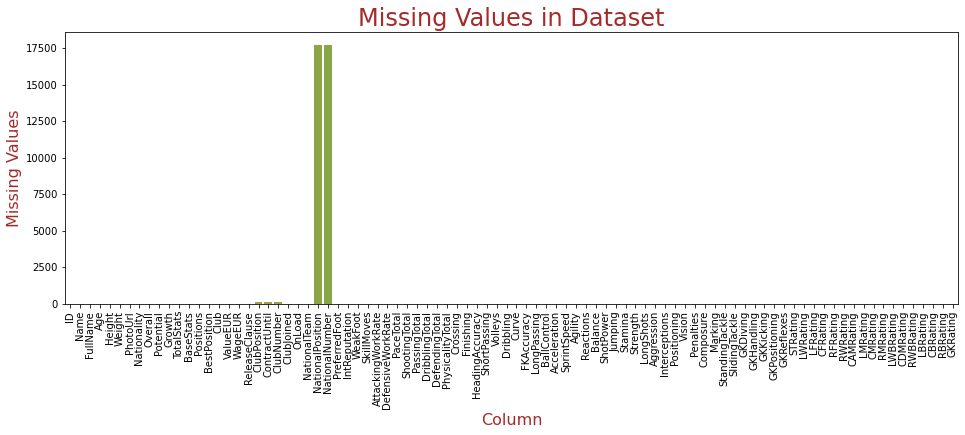

In [3]:
missing_values = df.isna().sum()

plt.figure(figsize=(16, 5))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.xlabel('Column', fontsize=16, color='brown')
plt.ylabel('Missing Values', fontsize=16, color='brown')
plt.title('Missing Values in Dataset', fontsize=24, color='brown')
plt.show()

In [4]:
missing_contract = df[df['ContractUntil'].isnull()]

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3">>>There are missing values in five columns of the data: Club position, Club number, Contract until, and National position, National number.</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>Because Club position, Club number, National position, and National number are all descriptive attributes of players and have no significant correlation with player value, position, or performance, we can remove them.</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>They have null values in the ContractUntil column because their contracts have ended, so we can set them as 2022. This way, when calculating the remaining years of the contract in the future, it will be calculated as 0.</font></div></td></tr>
</table>

In [5]:
df1 = df.drop(['ClubPosition', 'ClubNumber', 'NationalPosition', 'NationalNumber'], axis=1)
df1.loc[df1['ContractUntil'].isnull(), 'ContractUntil'] = 2022
print(df1.shape)

(18539, 86)


<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>2.5 Duplicate Value Checking</b></font></div></td></tr>
</table>

In [6]:
duplicate_rows = df1[df1.duplicated()]
duplicate_rows.shape

(119, 86)

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3">>>There are 119 duplicate rows, which we need to remove from the dataset.</font></div></td></tr>
</table>

In [7]:
df2 = df1.drop_duplicates()
print(df2.shape)

(18420, 86)


<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>2.6 Unrelevant Feature Checking</b></font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>There are 22 hidden attributes that only relate to the player's position rating, which do not affect our analysis and can be removed.</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>TotalStats, BaseStats, Growth, Potential, ClubJoin, NationalTeam, and PhotoUrl have no relationship with our analysis and can be removed.</font></div></td></tr>
</table>

In [8]:
df3 = df2.drop(['GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 
                 'STRating', 'LWRating', 'LFRating', 'CFRating', 'RFRating', 'RWRating',
                 'CAMRating', 'LMRating', 'CMRating', 'RMRating', 'LWBRating', 'CDMRating', 
                 'RWBRating', 'LBRating', 'CBRating', 'RBRating', 'GKRating'], axis=1)
df3 = df3.drop(['TotalStats', 'BaseStats', 'Growth', 'Potential', 'ClubJoined', 'NationalTeam', 'PhotoUrl'], axis=1)
print(df3.shape)

(18420, 57)


<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>2.7 Data Conversion</b></font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>1. Change ContractUntil value to int64 as remaining years.</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>2. Change PreferredFoot as right = 0 and left = 1.</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>3. Change 2 WorkRate Columns as Dummy variables.</font></div></td></tr>
</table>

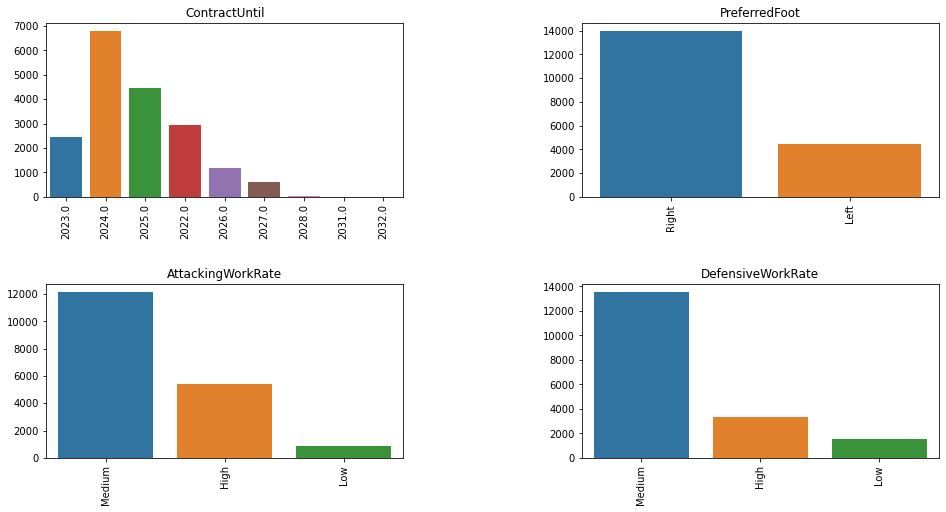

In [9]:
# Calculation
cu_counts = df3['ContractUntil'].value_counts()
pf_counts = df3['PreferredFoot'].value_counts()
awr_counts = df3['AttackingWorkRate'].value_counts()
dwr_counts = df3['DefensiveWorkRate'].value_counts()
# Plot
fig, axs = plt.subplots(2, 2, figsize=(16, 8))
# ContractUntil
sns.barplot(x=cu_counts.index, y=cu_counts.values, ax=axs[0, 0])
axs[0, 0].set_xticklabels(cu_counts.index, rotation=90)
axs[0, 0].set_title('ContractUntil')
# PreferredFoot
sns.barplot(x=pf_counts.index, y=pf_counts.values, ax=axs[0, 1])
axs[0, 1].set_xticklabels(pf_counts.index, rotation=90)
axs[0, 1].set_title('PreferredFoot')
# AttackingWorkRate
sns.barplot(x=awr_counts.index, y=awr_counts.values, ax=axs[1, 0])
axs[1, 0].set_xticklabels(awr_counts.index, rotation=90)
axs[1, 0].set_title('AttackingWorkRate')
# DefensiveWorkRate
sns.barplot(x=dwr_counts.index, y=dwr_counts.values, ax=axs[1, 1])
axs[1, 1].set_xticklabels(dwr_counts.index, rotation=90)
axs[1, 1].set_title('DefensiveWorkRate')
# adjust
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [10]:
# Create a copy
df4 = df3.copy()
# Change ContractUntil value to int64 as remaining years
df4['ContractUntil']=df4['ContractUntil']-2022
# Change PreferredFoot as right = 0 and left = 1
df4['PreferredFoot'] = df4['PreferredFoot'].apply(lambda x: 0 if x=='Right' else 1)
# Change 2 WorkRate Columns as Dummy variables
awr_dummy = pd.get_dummies(df4['AttackingWorkRate'], prefix='AWR')
awr_dummy.columns = ['AWR_High', 'AWR_Low', 'AWR_Medium']
df4 = pd.concat([df4, awr_dummy], axis=1)
dwr_dummy = pd.get_dummies(df4['DefensiveWorkRate'], prefix='DWR')
dwr_dummy.columns = ['DWR_High', 'DWR_Low', 'DWR_Medium']
df4 = pd.concat([df4, dwr_dummy], axis=1)
df4[['AWR_High', 'AWR_Low', 'AWR_Medium']] = df4[['AWR_High', 'AWR_Low', 'AWR_Medium']].astype('int64')
df4[['DWR_High', 'DWR_Low', 'DWR_Medium']] = df4[['DWR_High', 'DWR_Low', 'DWR_Medium']].astype('int64')
# Remove Extra columns and change to int64
df4 = df4.drop(['AttackingWorkRate', 'DefensiveWorkRate', 'AWR_Low', 'DWR_Low'], axis=1)
df4['OnLoad'] = df4['OnLoad'].fillna(0).astype('int64')
df4['ContractUntil'] = df4['ContractUntil'].fillna(0).astype('int64')
print(df4.shape)

(18420, 59)


<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>2.8 Subset Selection </b></font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">Because the requirements for goalkeepers' attributes are different from those for other positions, it is not suitable to analyze them together. Therefore, goalkeepers are removed from the observations.</font></div></td></tr>
</table>

In [11]:
# Remove Goalkeeper
df5 = df4[df4['BestPosition'] != 'GK']
print(df5.shape)

(16367, 59)


<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>2.9 Data Cleaning Summary</b></font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>1. After data cleaning, our dataset now has 52 integer features and 5 object features and 16367 players. </font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>2. We filled in missing values, removed duplicate values and irrelevant variables, and converted formats.</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>3. Next, we will conduct EDA to further explore the data, which may require further cleaning.</font></div></td></tr>
</table>

<table style="width: 800px"><tr><td bgcolor="darkred"><font color="white"><div style="text-align: left;"><font size="4"><b>3. Exploratory Data Analysis</b></font></div></font></td></tr></table>

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>3.1 Features Distribution</b></font></div></td></tr>
</table>

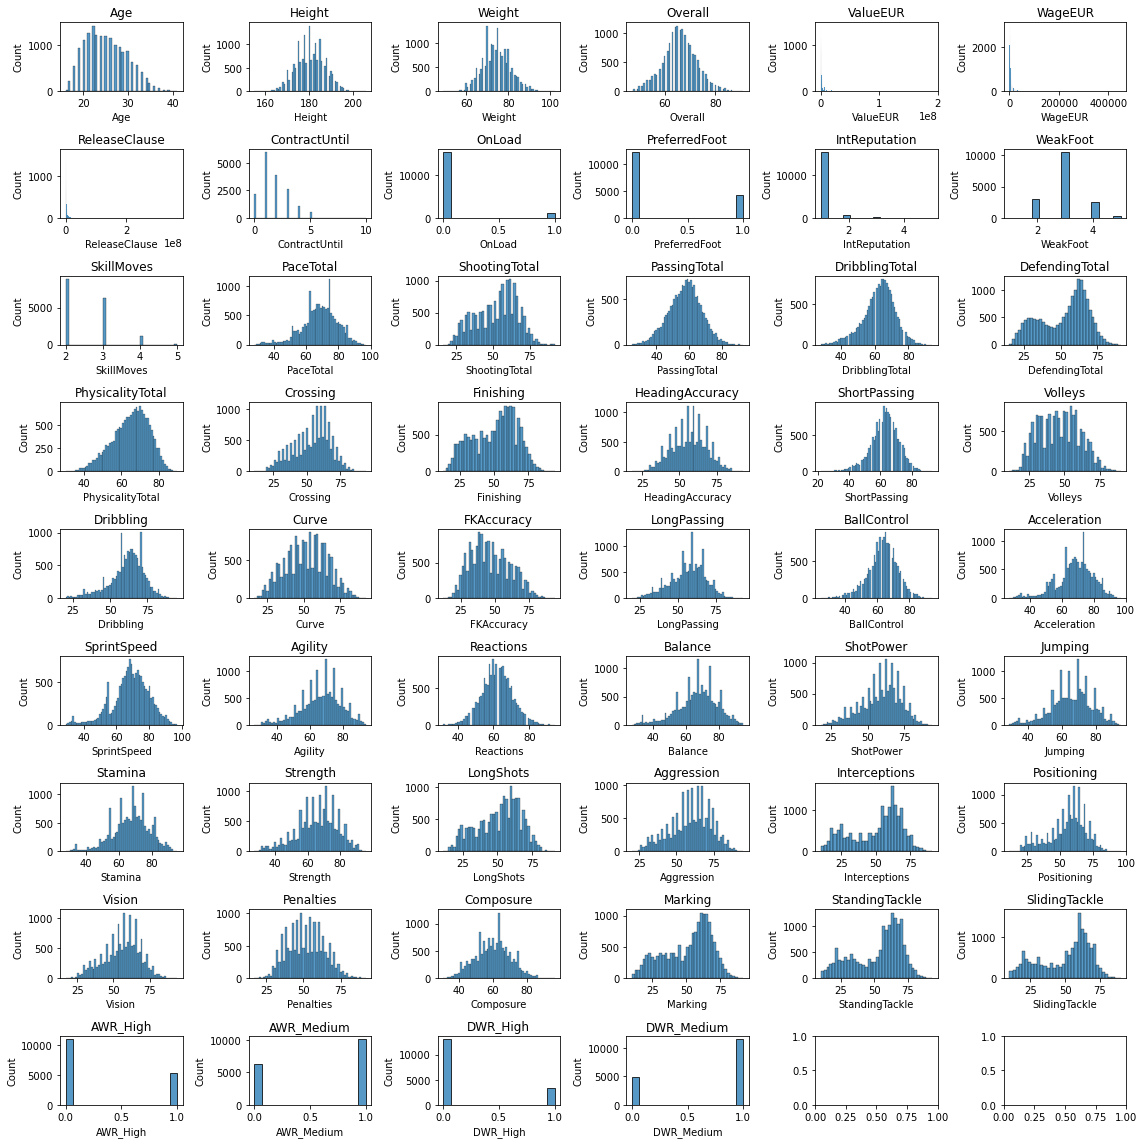

In [12]:
int_features = df5.select_dtypes(include=['int']).drop(
    'ID',axis=1).columns.tolist()

# 6 x 9 row = 52 images
num_features = len(int_features)
num_cols = 6
num_rows = num_features // num_cols + (num_features % num_cols > 0)

fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 16))
for i, feature in enumerate(int_features):
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    sns.histplot(df5[feature], kde=False, ax=axs[row_idx][col_idx])
    axs[row_idx][col_idx].set_title(feature)
    
plt.tight_layout()
plt.show()

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3">>>1. The distribution of most of the feature values satisfies normal distribution.</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>2. WageEUR and ReleaseClause are greatly influenced by Value and are not suitable for use.</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>3. ValueEUR, as the core variable of this analysis, requires further observation.</font></div></td></tr>
</table>

In [13]:
df6 = df5.drop(['WageEUR', 'ReleaseClause'], axis=1)
print(df6.shape)

(16367, 57)


<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3">>>Remove outliers: only keep between 100,000 and 100,000,000.</font></div></td></tr>
</table>

In [14]:
df7 = df6.loc[(df6['ValueEUR'] >= 10000) & (df6['ValueEUR'] < 100000000)]
print(df7.shape)

(16271, 57)


Text(0, 0.5, 'Frequency')

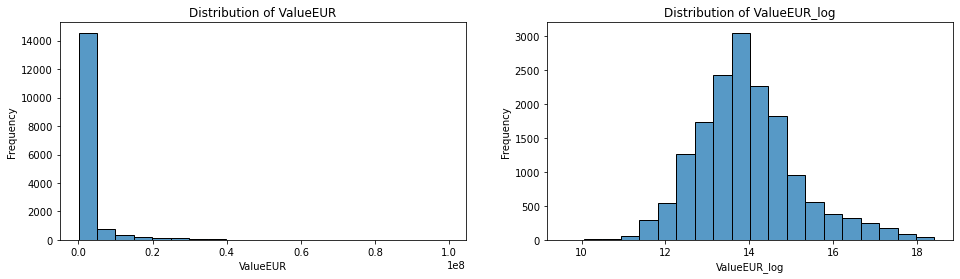

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

sns.histplot(data=df7['ValueEUR'], bins=20, edgecolor='black', ax=axs[0])
axs[0].set_title('Distribution of ValueEUR')
axs[0].set_xlabel('ValueEUR')
axs[0].set_ylabel('Frequency')

df7['ValueEUR_log'] = np.log1p(df7['ValueEUR'])
sns.histplot(data=df7['ValueEUR_log'], bins=20, edgecolor='black', ax=axs[1])
axs[1].set_title('Distribution of ValueEUR_log')
axs[1].set_xlabel('ValueEUR_log')
axs[1].set_ylabel('Frequency')

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3">>>1. The distribution of Value is left-skewed, which may impact regression performance.</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>2. By transforming with logarithm, the distribution of ValueEUR approaches a normal distribution.</font></div></td></tr>
</table>

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>3.2 Features Correlation</b></font></div></td></tr>
</table>

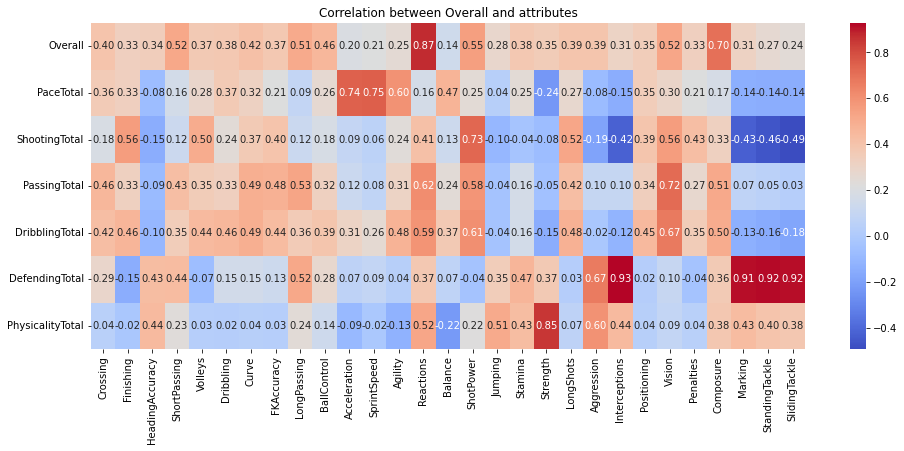

In [16]:
cols1 = ['Overall', 'PaceTotal', 'ShootingTotal', 'PassingTotal',
         'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal']

cols2 = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
         'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
         'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
         'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
         'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
         'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']

# Calculation
corr_matrix = df[cols1 + cols2].corr()
corr_table = corr_matrix[cols2].loc[cols1]

# Heatmap
fig, ax = plt.subplots(figsize=(16, 6))
sns.heatmap(corr_table, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation between Overall and attributes')

plt.show()

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3">>>1. General Attributes (7) are all strongly correlated with some of Specific Attributes (29).</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>2. Using both General Attributes and Specific Attributes could lead to multi-collinearity.</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>3. Since General Attributes are calculated based on Specific Attributes, we will keep Specific Attributes.</font></div></td></tr>
</table>

In [17]:
df8 = df7.drop(['PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal'], axis=1)
print(df8.shape)

(16271, 52)


<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>3.3 EDA Summary</b></font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>1. Most features are close to normally distributed besides ValueEUR. </font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>2. General Attributes and Specific Attributes cannot be both in this analysis.</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>3. Next, we will try different combinations to apply regression to predict the market value of football players.</font></div></td></tr>
</table>

<table style="width: 800px"><tr><td bgcolor="darkred"><font color="white"><div style="text-align: left;"><font size="4"><b>4. Regression</b></font></div></font></td></tr></table>

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3">>>X: all numerical variables besides ID, ValueEUR, and Overall</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>y: ValueEUR</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>Split trainset and testset</font></div></td></tr>
</table>

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
df9 = df8[df8['Club'] != 'AC Milan']
X = df9.select_dtypes(include=['int']).drop(['ID', 'ValueEUR', 'Overall'], axis=1)
y = df9['ValueEUR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=26)
print(X_train.shape)
print(X_test.shape)

(11370, 42)
(4874, 42)


In [19]:
# Select Milan Players 
milan = df8[df8['Club'] == 'AC Milan']
players = ['T. Hernández', 'F. Tomori', 'S. Kjær', 'D. Calabria', 'S. Tonali', 'R. Krunić', 
           'Rafael Leão', 'I. Bennacer', 'Brahim', 'O. Giroud']
milan_players = milan.loc[milan['Name'].isin(players)].reset_index(drop=True)
X_milan = milan_players.select_dtypes(include=['int']).drop(['ID', 'ValueEUR', 'Overall'], axis=1)
y_milan = milan_players['ValueEUR']
print(X_milan.shape)

(10, 42)


<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>4.1 Linear Regression </b></font></div></td></tr>
</table>

In [20]:
# Library
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, LassoCV, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import time

R2 Score: 0.5013
MAE: 2430090.0
MSE: 21612327480836.0
Calculation Time: 0.0389 seconds


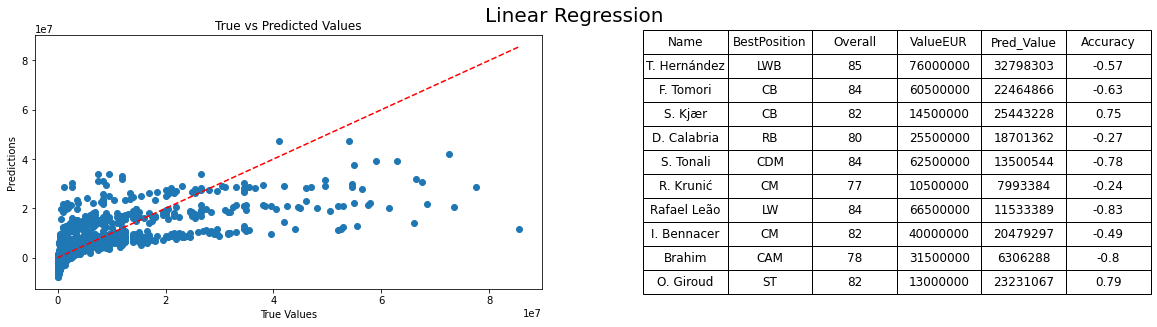

In [21]:
start_time = time.time()
# Linear Regression
LinearR_Model = LinearRegression()
LinearR_Model.fit(X_train, y_train)
y_pred = LinearR_Model.predict(X_test)
r2 = round(r2_score(y_test, y_pred),4)
mae = round(mean_absolute_error(y_test, y_pred),0)
mse = round(mean_squared_error(y_test, y_pred),0)
print('R2 Score:', r2)
print('MAE:', mae)
print('MSE:', mse)
end_time = time.time()
print('Calculation Time:', round(end_time - start_time, 4), 'seconds')

# Update Scatter
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
fig.subplots_adjust(bottom=0)
fig.suptitle('Linear Regression', fontsize=20)
fig.subplots_adjust(hspace=0.3)
ax1.scatter(y_test, y_pred)
ax1.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
ax1.set_xlabel("True Values")
ax1.set_ylabel("Predictions")
ax1.set_title('True vs Predicted Values')
# Update Table non-log
milan_pred = LinearR_Model.predict(X_milan)

milan_players['Pred_Value'] = np.round((milan_pred), 0).astype(int)
milan_players['Accuracy'] = np.round((np.divide(milan_players['Pred_Value'], milan_players['ValueEUR'])-1),2)
milan_players_selected = milan_players[['Name', 'BestPosition', 'Overall', 'ValueEUR', 'Pred_Value', 'Accuracy']]
milan_players_selected = milan_players_selected.reindex(index=[0, 3, 6, 7, 2, 9, 1, 4, 8, 5])
table_data = [list(milan_players_selected.columns)] + milan_players_selected.values.tolist()
table = ax2.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)
plt.axis('off')
plt.show()

R2 Score: 0.7453
MAE: 988093.0
MSE: 11036989963568.0
Calculation Time: 0.0409 seconds


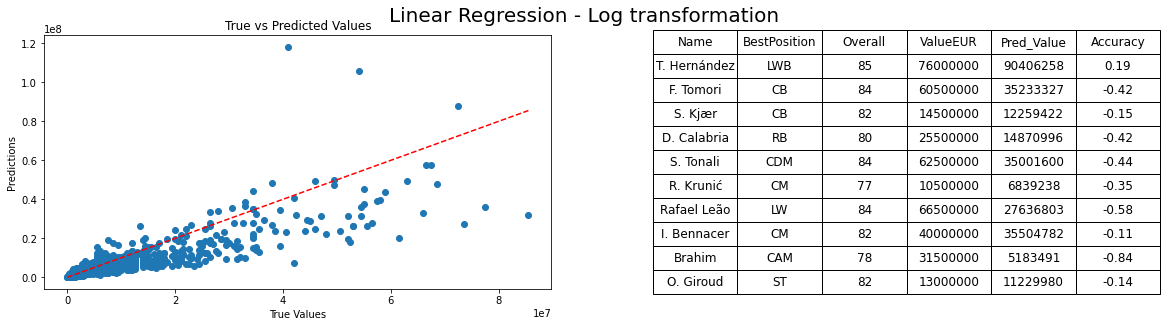

In [22]:
start_time = time.time()
# Linear Regression
y_train_log1p = np.log1p(y_train)
LinearR_log_Model = LinearRegression()
LinearR_log_Model.fit(X_train, y_train_log1p)
y_pred_log1p = LinearR_log_Model.predict(X_test)
y_pred = np.expm1(y_pred_log1p)
# Evaluate R2 MAE and MSE
r2 = round(r2_score(y_test, y_pred),4)
mae = round(mean_absolute_error(y_test, y_pred),0)
mse = round(mean_squared_error(y_test, y_pred),0)
print('R2 Score:', r2)
print('MAE:', mae)
print('MSE:', mse)
end_time = time.time()
print('Calculation Time:', round(end_time - start_time, 4), 'seconds')

# Update Scatter
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
fig.subplots_adjust(bottom=0)
fig.suptitle('Linear Regression - Log transformation', fontsize=20)
ax1.scatter(y_test, y_pred)
ax1.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
ax1.set_xlabel("True Values")
ax1.set_ylabel("Predictions")
ax1.set_title('True vs Predicted Values')
# Update Table log
milan_pred = LinearR_log_Model.predict(X_milan)

milan_players['Pred_Value'] = np.round(np.expm1(milan_pred), 0).astype(int)
milan_players['Accuracy'] = np.round((np.divide(milan_players['Pred_Value'], milan_players['ValueEUR'])-1),2)
milan_players_selected = milan_players[['Name', 'BestPosition', 'Overall', 'ValueEUR', 'Pred_Value', 'Accuracy']]
milan_players_selected = milan_players_selected.reindex(index=[0, 3, 6, 7, 2, 9, 1, 4, 8, 5])
table_data = [list(milan_players_selected.columns)] + milan_players_selected.values.tolist()
table = ax2.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)
plt.axis('off')
plt.show()

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>4.2 Ridge Regression </b></font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3"><b>alpha = ridgeCV_Model.alpha_ </b></font></div></td></tr>
</table>

In [23]:
'''
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
# Best Hyper
ridgeCV_Model = RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100], cv=5)
ridgeCV_Model.fit(X_train, y_train)
alpha = ridgeCV_Model.alpha_
print('Best Alpha:', alpha)
'''

"\nfrom sklearn.linear_model import RidgeCV\nfrom sklearn.linear_model import Ridge\n# Best Hyper\nridgeCV_Model = RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100], cv=5)\nridgeCV_Model.fit(X_train, y_train)\nalpha = ridgeCV_Model.alpha_\nprint('Best Alpha:', alpha)\n"

R2 Score: 0.5014
MAE: 2430157.0
MSE: 21608282867071.0
Calculation Time: 0.0422 seconds


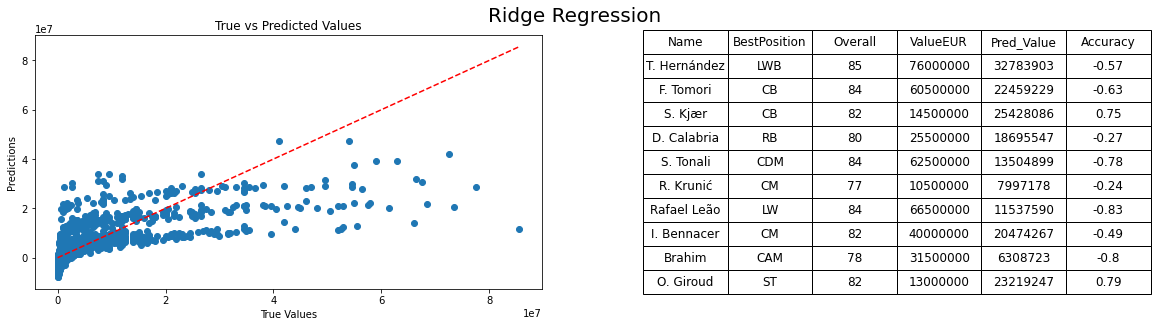

In [24]:
start_time = time.time()
#Ridge Regression
RidgeR_Model = Ridge()
RidgeR_Model.fit(X_train, y_train)
y_pred = RidgeR_Model.predict(X_test)
# Evaluate R2 MAE and MSE
r2 = round(r2_score(y_test, y_pred), 4)
mae = round(mean_absolute_error(y_test, y_pred), 0)
mse = round(mean_squared_error(y_test, y_pred), 0)
print('R2 Score:', r2)
print('MAE:', mae)
print('MSE:', mse)
end_time = time.time()
print('Calculation Time:', round(end_time - start_time, 4), 'seconds')

# Update Scatter
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
fig.subplots_adjust(bottom=0)
fig.suptitle('Ridge Regression', fontsize=20)
ax1.scatter(y_test, y_pred)
ax1.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
ax1.set_xlabel("True Values")
ax1.set_ylabel("Predictions")
ax1.set_title('True vs Predicted Values')
# Update Table non-log
milan_pred = RidgeR_Model.predict(X_milan)

milan_players['Pred_Value'] = np.round((milan_pred), 0).astype(int)
milan_players['Accuracy'] = np.round((np.divide(milan_players['Pred_Value'], milan_players['ValueEUR'])-1),2)
milan_players_selected = milan_players[['Name', 'BestPosition', 'Overall', 'ValueEUR', 'Pred_Value', 'Accuracy']]
milan_players_selected = milan_players_selected.reindex(index=[0, 3, 6, 7, 2, 9, 1, 4, 8, 5])
table_data = [list(milan_players_selected.columns)] + milan_players_selected.values.tolist()
table = ax2.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)
plt.axis('off')
plt.show()

R2 Score: 0.7455
MAE: 988040.0
MSE: 11028654905058.0
Calculation Time: 0.0359 seconds


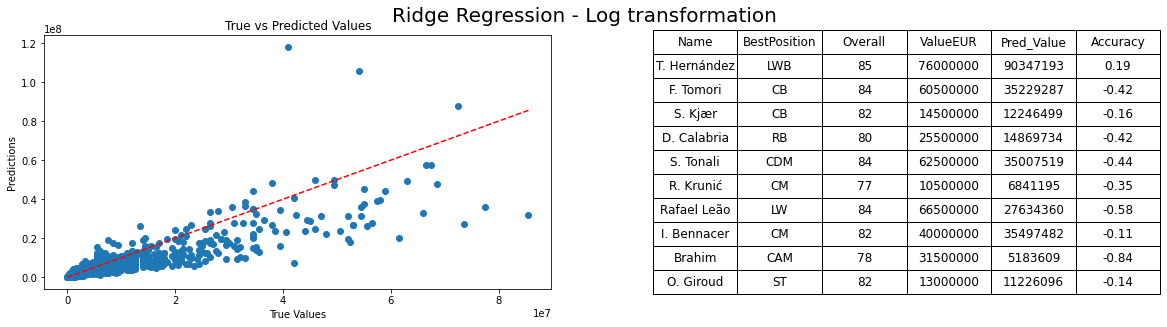

In [25]:
start_time = time.time()
y_train_log1p = np.log1p(y_train)
#Ridge Regression
RidgeR_log_Model = Ridge()
RidgeR_log_Model.fit(X_train, y_train_log1p)
y_pred_log1p = RidgeR_log_Model.predict(X_test)
y_pred = np.expm1(y_pred_log1p)
# Evaluate R2 MAE and MSE
r2 = round(r2_score(y_test, y_pred), 4)
mae = round(mean_absolute_error(y_test, y_pred), 0)
mse = round(mean_squared_error(y_test, y_pred), 0)
print('R2 Score:', r2)
print('MAE:', mae)
print('MSE:', mse)
end_time = time.time()
print('Calculation Time:', round(end_time - start_time, 4), 'seconds')

# Update Scatter
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
fig.subplots_adjust(bottom=0)
fig.suptitle('Ridge Regression - Log transformation', fontsize=20)
ax1.scatter(y_test, y_pred)
ax1.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
ax1.set_xlabel("True Values")
ax1.set_ylabel("Predictions")
ax1.set_title('True vs Predicted Values')
# Update Table log
milan_pred = RidgeR_log_Model.predict(X_milan)

milan_players['Pred_Value'] = np.round(np.expm1(milan_pred), 0).astype(int)
milan_players['Accuracy'] = np.round((np.divide(milan_players['Pred_Value'], milan_players['ValueEUR'])-1),2)
milan_players_selected = milan_players[['Name', 'BestPosition', 'Overall', 'ValueEUR', 'Pred_Value', 'Accuracy']]
milan_players_selected = milan_players_selected.reindex(index=[0, 3, 6, 7, 2, 9, 1, 4, 8, 5])
table_data = [list(milan_players_selected.columns)] + milan_players_selected.values.tolist()
table = ax2.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)
plt.axis('off')
plt.show()

In [26]:
print(RidgeR_Model.get_params())
print(RidgeR_log_Model.get_params())

{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}


<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>4.3 Lasso Regression </b></font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3"><b>alpha = LassoCV_Model.alpha_ </b></font></div></td></tr>
</table>

In [27]:
'''
# Best Hyper
lassoCV_Model = LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100], cv=5)
lassoCV_Model.fit(X_train, y_train)
alpha = lassoCV_Model.alpha_
print('Best Alpha:', alpha)
'''

"\n# Best Hyper\nlassoCV_Model = LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100], cv=5)\nlassoCV_Model.fit(X_train, y_train)\nalpha = lassoCV_Model.alpha_\nprint('Best Alpha:', alpha)\n"

R2 Score: 0.5013
MAE: 2430089.0
MSE: 21612323298719.0
Calculation Time: 0.7538 seconds


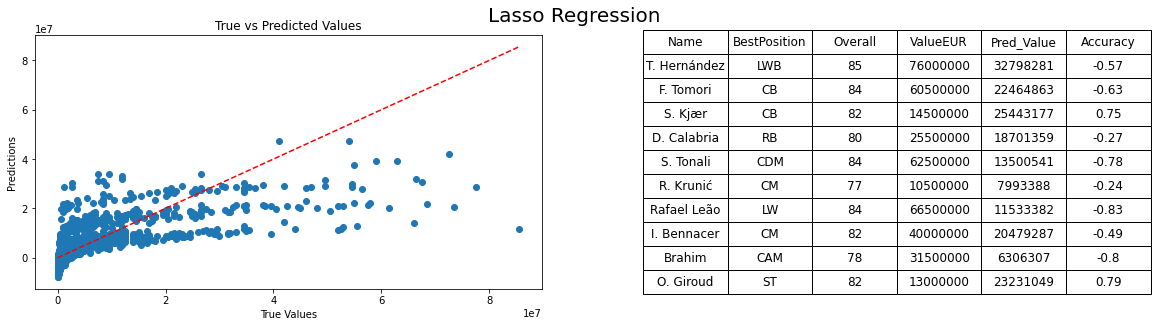

In [28]:
start_time = time.time()
# Lasso Regression
LassoR_Model = Lasso()
LassoR_Model.fit(X_train, y_train)
y_pred = LassoR_Model.predict(X_test)
# Evaluate R2 MAE and MSE
r2 = round(r2_score(y_test, y_pred), 4)
mae = round(mean_absolute_error(y_test, y_pred), 0)
mse = round(mean_squared_error(y_test, y_pred), 0)
print('R2 Score:', r2)
print('MAE:', mae)
print('MSE:', mse)
end_time = time.time()
print('Calculation Time:', round(end_time - start_time, 4), 'seconds')

# Update Scatter
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
fig.subplots_adjust(bottom=0)
fig.suptitle('Lasso Regression', fontsize=20)
ax1.scatter(y_test, y_pred)
ax1.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
ax1.set_xlabel("True Values")
ax1.set_ylabel("Predictions")
ax1.set_title('True vs Predicted Values')
# Update Table non-log
milan_pred = LassoR_Model.predict(X_milan)

milan_players['Pred_Value'] = np.round((milan_pred), 0).astype(int)
milan_players['Accuracy'] = np.round((np.divide(milan_players['Pred_Value'], milan_players['ValueEUR'])-1),2)
milan_players_selected = milan_players[['Name', 'BestPosition', 'Overall', 'ValueEUR', 'Pred_Value', 'Accuracy']]
milan_players_selected = milan_players_selected.reindex(index=[0, 3, 6, 7, 2, 9, 1, 4, 8, 5])
table_data = [list(milan_players_selected.columns)] + milan_players_selected.values.tolist()
table = ax2.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)
plt.axis('off')
plt.show()

R2 Score: 0.7632
MAE: 985644.0
MSE: 10262798943037.0
Calculation Time: 0.3467 seconds


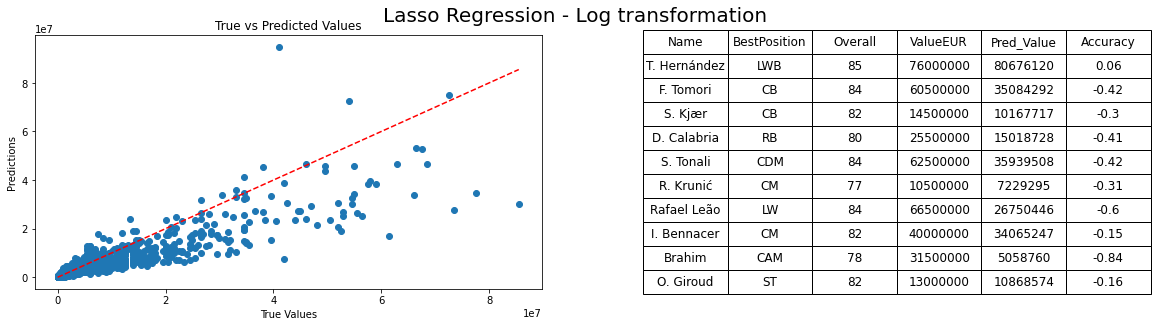

In [29]:
start_time = time.time()
y_train_log1p = np.log1p(y_train)
# Lasso Regression
LassoR_log_Model = Lasso(alpha=0.005)
LassoR_log_Model.fit(X_train, y_train_log1p)
y_pred_log1p = LassoR_log_Model.predict(X_test)
y_pred = np.expm1(y_pred_log1p)
# Evaluate R2 MAE and MSE
r2 = round(r2_score(y_test, y_pred), 4)
mae = round(mean_absolute_error(y_test, y_pred), 0)
mse = round(mean_squared_error(y_test, y_pred), 0)
print('R2 Score:', r2)
print('MAE:', mae)
print('MSE:', mse)
end_time = time.time()
print('Calculation Time:', round(end_time - start_time, 4), 'seconds')

# Update Scatter
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
fig.subplots_adjust(bottom=0)
fig.suptitle('Lasso Regression - Log transformation', fontsize=20)
ax1.scatter(y_test, y_pred)
ax1.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
ax1.set_xlabel("True Values")
ax1.set_ylabel("Predictions")
ax1.set_title('True vs Predicted Values')
# Update Table log
milan_pred = LassoR_log_Model.predict(X_milan)

milan_players['Pred_Value'] = np.round(np.expm1(milan_pred), 0).astype(int)
milan_players['Accuracy'] = np.round((np.divide(milan_players['Pred_Value'], milan_players['ValueEUR'])-1),2)
milan_players_selected = milan_players[['Name', 'BestPosition', 'Overall', 'ValueEUR', 'Pred_Value', 'Accuracy']]
milan_players_selected = milan_players_selected.reindex(index=[0, 3, 6, 7, 2, 9, 1, 4, 8, 5])
table_data = [list(milan_players_selected.columns)] + milan_players_selected.values.tolist()
table = ax2.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)
plt.axis('off')
plt.show()

In [30]:
print(LassoR_Model.get_params())
print(LassoR_log_Model.get_params())

{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': 'deprecated', 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
{'alpha': 0.005, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': 'deprecated', 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>4.3 Multi-nominal Regression </b></font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3"><b>Create poly_features.fit_transform </b></font></div></td></tr></table>

R2 Score: 0.7785
MAE: 1663694.0
MSE: 9601522135004.0
Calculation Time: 2.4765 seconds


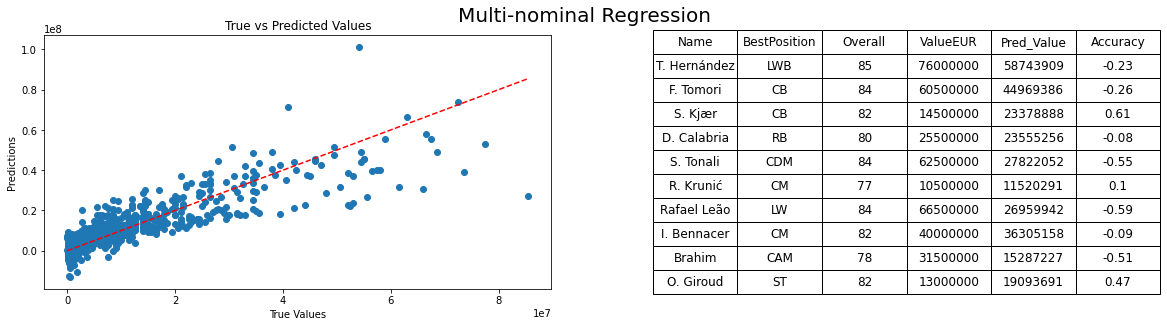

In [31]:
start_time = time.time()
# Multi-nominal
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
# Multi-nominal Regression
MNR_Model = LinearRegression()
MNR_Model.fit(X_train_poly, y_train)
y_pred = MNR_Model.predict(X_test_poly)
# Evaluate R2 MAE and MSE
r2 = round(r2_score(y_test, y_pred),4)
mae = round(mean_absolute_error(y_test, y_pred),0)
mse = round(mean_squared_error(y_test, y_pred),0)
print('R2 Score:', r2)
print('MAE:', mae)
print('MSE:', mse)
end_time = time.time()
print('Calculation Time:', round(end_time - start_time, 4), 'seconds')

# Update Scatter
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
fig.subplots_adjust(bottom=0)
fig.suptitle('Multi-nominal Regression', fontsize=20)
ax1.scatter(y_test, y_pred)
ax1.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
ax1.set_xlabel("True Values")
ax1.set_ylabel("Predictions")
ax1.set_title('True vs Predicted Values')
# Update Table non-log
milan_poly = poly_features.fit_transform(X_milan)
milan_pred = MNR_Model.predict(milan_poly)

milan_players['Pred_Value'] = np.round((milan_pred), 0).astype(int)
milan_players['Accuracy'] = np.round((np.divide(milan_players['Pred_Value'], milan_players['ValueEUR'])-1),2)
milan_players_selected = milan_players[['Name', 'BestPosition', 'Overall', 'ValueEUR', 'Pred_Value', 'Accuracy']]
milan_players_selected = milan_players_selected.reindex(index=[0, 3, 6, 7, 2, 9, 1, 4, 8, 5])
table_data = [list(milan_players_selected.columns)] + milan_players_selected.values.tolist()
table = ax2.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)
plt.axis('off')
plt.show()

R2 Score: 0.8763
MAE: 629980.0
MSE: 5359653235561.0
Calculation Time: 1.5708 seconds


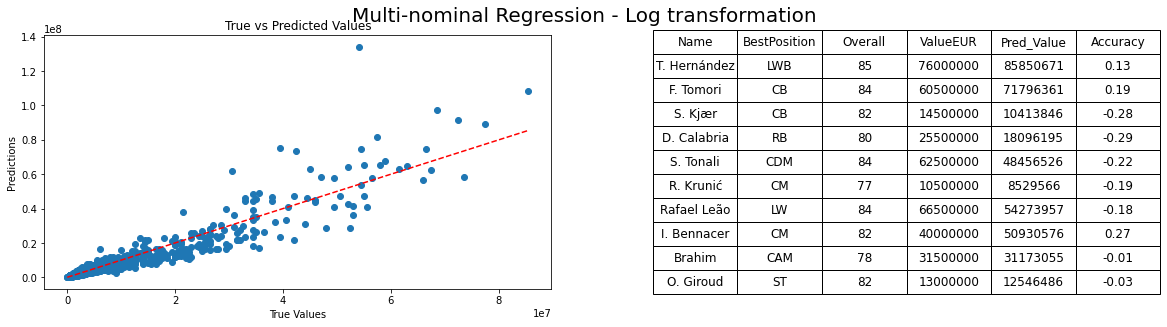

In [32]:
start_time = time.time()
y_train_log1p = np.log1p(y_train)
# Multi-nominal
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
# Multi-nominal Regression
MNR_log_Model = LinearRegression()
MNR_log_Model.fit(X_train_poly, y_train_log1p)
y_pred_log1p = MNR_log_Model.predict(X_test_poly)
y_pred = np.expm1(y_pred_log1p)
# Evaluate R2 MAE and MSE
r2 = round(r2_score(y_test, y_pred),4)
mae = round(mean_absolute_error(y_test, y_pred),0)
mse = round(mean_squared_error(y_test, y_pred),0)
print('R2 Score:', r2)
print('MAE:', mae)
print('MSE:', mse)
end_time = time.time()
print('Calculation Time:', round(end_time - start_time, 4), 'seconds')

# Update Scatter
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
fig.subplots_adjust(bottom=0)
fig.suptitle('Multi-nominal Regression - Log transformation', fontsize=20)
ax1.scatter(y_test, y_pred)
ax1.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
ax1.set_xlabel("True Values")
ax1.set_ylabel("Predictions")
ax1.set_title('True vs Predicted Values')
# Update Table log
milan_poly = poly_features.fit_transform(X_milan)
milan_pred = MNR_log_Model.predict(milan_poly)

milan_players['Pred_Value'] = np.round(np.expm1(milan_pred), 0).astype(int)
milan_players['Accuracy'] = np.round((np.divide(milan_players['Pred_Value'], milan_players['ValueEUR'])-1),2)
milan_players_selected = milan_players[['Name', 'BestPosition', 'Overall', 'ValueEUR', 'Pred_Value', 'Accuracy']]
milan_players_selected = milan_players_selected.reindex(index=[0, 3, 6, 7, 2, 9, 1, 4, 8, 5])
table_data = [list(milan_players_selected.columns)] + milan_players_selected.values.tolist()
table = ax2.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)
plt.axis('off')
plt.show()

In [33]:
print(MNR_Model.get_params())
print(MNR_Model.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>4.5 KNN Regression</b></font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3"><b>best_k = knn_Model.best_params_['n_neighbors']</b></font></div></td></tr>
</table>

In [34]:
'''
# Best Hyper
param_grid = {'n_neighbors': range(1, 11)}
knn_Model = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
knn_Model.fit(X_train, y_train)
best_k = knn_Model.best_params_['n_neighbors']
print('Best K:', best_k)
'''

"\n# Best Hyper\nparam_grid = {'n_neighbors': range(1, 11)}\nknn_Model = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)\nknn_Model.fit(X_train, y_train)\nbest_k = knn_Model.best_params_['n_neighbors']\nprint('Best K:', best_k)\n"

R2 Score: 0.7428
MAE: 1094924.0
MSE: 11145900528328.0
Calculation Time: 3.5782 seconds


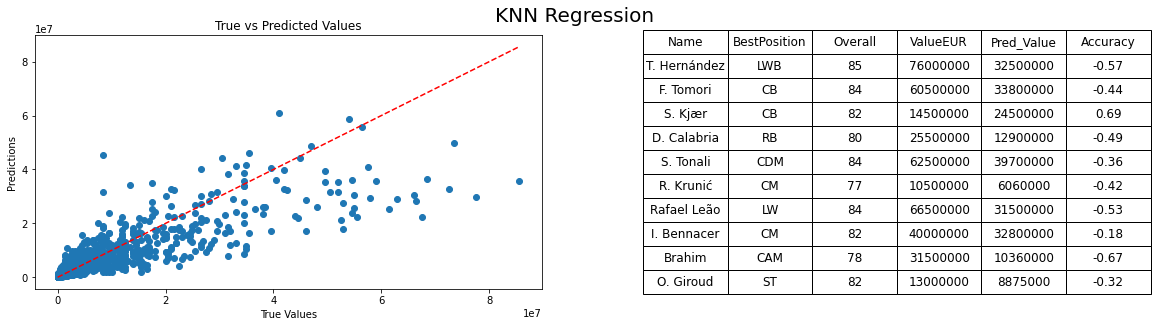

In [35]:
start_time = time.time()
# KNN Regression
KNN_Model = KNeighborsRegressor()
KNN_Model.fit(X_train, y_train)
y_pred = KNN_Model.predict(X_test)
# Evaluate R2 MAE and MSE
r2 = round(r2_score(y_test, y_pred), 4)
mae = round(mean_absolute_error(y_test, y_pred), 0)
mse = round(mean_squared_error(y_test, y_pred), 0)
print('R2 Score:', r2)
print('MAE:', mae)
print('MSE:', mse)
end_time = time.time()
print('Calculation Time:', round(end_time - start_time, 4), 'seconds')

# Update Scatter
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
fig.subplots_adjust(bottom=0)
fig.suptitle('KNN Regression', fontsize=20)
ax1.scatter(y_test, y_pred)
ax1.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
ax1.set_xlabel("True Values")
ax1.set_ylabel("Predictions")
ax1.set_title('True vs Predicted Values')
# Update Table log
milan_pred = KNN_Model.predict(X_milan)

milan_players['Pred_Value'] = np.round((milan_pred), 0).astype(int)
milan_players['Accuracy'] = np.round((np.divide(milan_players['Pred_Value'], milan_players['ValueEUR'])-1),2)
milan_players_selected = milan_players[['Name', 'BestPosition', 'Overall', 'ValueEUR', 'Pred_Value', 'Accuracy']]
milan_players_selected = milan_players_selected.reindex(index=[0, 3, 6, 7, 2, 9, 1, 4, 8, 5])
table_data = [list(milan_players_selected.columns)] + milan_players_selected.values.tolist()
table = ax2.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)
plt.axis('off')
plt.show()

R2 Score: 0.6932
MAE: 1122900.0
MSE: 13296664187068.0
Calculation Time: 3.6226 seconds


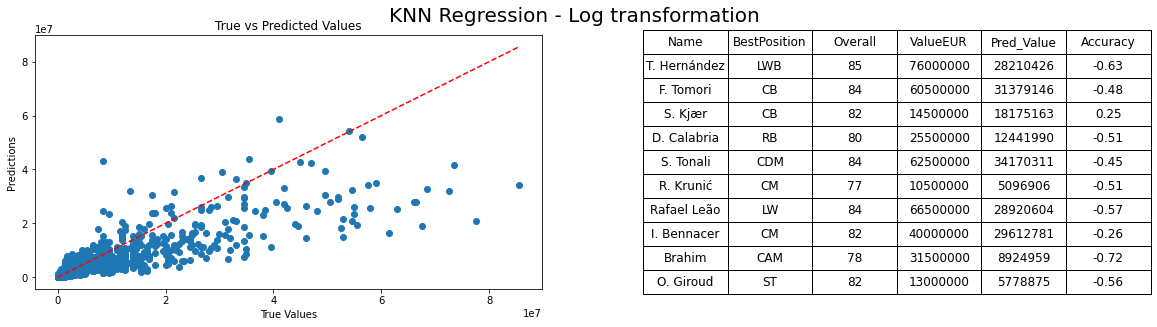

In [36]:
start_time = time.time()
y_train_log1p = np.log1p(y_train)
# KNN Regression
KNN_log_Model = KNeighborsRegressor()
KNN_log_Model.fit(X_train, y_train_log1p)
y_pred_log1p = KNN_log_Model.predict(X_test)
y_pred = np.expm1(y_pred_log1p)
# Evaluate R2 MAE and MSE
r2 = round(r2_score(y_test, y_pred), 4)
mae = round(mean_absolute_error(y_test, y_pred), 0)
mse = round(mean_squared_error(y_test, y_pred), 0)
print('R2 Score:', r2)
print('MAE:', mae)
print('MSE:', mse)
end_time = time.time()
print('Calculation Time:', round(end_time - start_time, 4), 'seconds')

# Update Scatter
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
fig.subplots_adjust(bottom=0)
fig.suptitle('KNN Regression - Log transformation', fontsize=20)
ax1.scatter(y_test, y_pred)
ax1.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
ax1.set_xlabel("True Values")
ax1.set_ylabel("Predictions")
ax1.set_title('True vs Predicted Values')
# Update Table log
milan_pred = KNN_log_Model.predict(X_milan)

milan_players['Pred_Value'] = np.round(np.expm1(milan_pred), 0).astype(int)
milan_players['Accuracy'] = np.round((np.divide(milan_players['Pred_Value'], milan_players['ValueEUR'])-1),2)
milan_players_selected = milan_players[['Name', 'BestPosition', 'Overall', 'ValueEUR', 'Pred_Value', 'Accuracy']]
milan_players_selected = milan_players_selected.reindex(index=[0, 3, 6, 7, 2, 9, 1, 4, 8, 5])
table_data = [list(milan_players_selected.columns)] + milan_players_selected.values.tolist()
table = ax2.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)
plt.axis('off')
plt.show()

In [37]:
print(KNN_Model.get_params())
print(KNN_log_Model.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>4.6 Decision Tree Regression </b></font></div></td></tr>
</table>

In [38]:
'''
# Best Hyper
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [15, 30, 45],
    'min_samples_leaf': [5, 10, 15],
    'max_leaf_nodes': [15, 30, 45]}
dt_Model = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
dt_Model.fit(X_train, y_train)
best_params = dt_Model.best_params_
print('Best Parameters:', best_params)
'''

"\n# Best Hyper\nparam_grid = {\n    'max_depth': [5, 10, 15],\n    'min_samples_split': [15, 30, 45],\n    'min_samples_leaf': [5, 10, 15],\n    'max_leaf_nodes': [15, 30, 45]}\ndt_Model = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)\ndt_Model.fit(X_train, y_train)\nbest_params = dt_Model.best_params_\nprint('Best Parameters:', best_params)\n"

R2 Score: 0.7162
MAE: 1082433.0
MSE: 12298368109027.0
Calculation Time: 1.7313 seconds


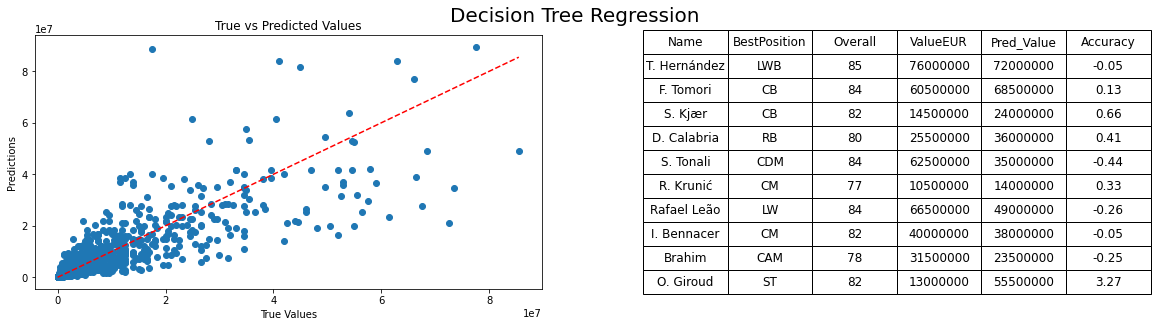

In [39]:
start_time = time.time()
# Decision Tree Regression
DT_Model = DecisionTreeRegressor(random_state=26)
DT_Model.fit(X_train, y_train)
y_pred = DT_Model.predict(X_test)
# Evaluate R2 MAE and MSE
r2 = round(r2_score(y_test, y_pred), 4)
mae = round(mean_absolute_error(y_test, y_pred), 0)
mse = round(mean_squared_error(y_test, y_pred), 0)
print('R2 Score:', r2)
print('MAE:', mae)
print('MSE:', mse)
end_time = time.time()
print('Calculation Time:', round(end_time - start_time, 4), 'seconds')

# Update Scatter
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
fig.subplots_adjust(bottom=0)
fig.suptitle('Decision Tree Regression', fontsize=20)
ax1.scatter(y_test, y_pred)
ax1.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
ax1.set_xlabel("True Values")
ax1.set_ylabel("Predictions")
ax1.set_title('True vs Predicted Values')
# Update Table log
milan_pred = DT_Model.predict(X_milan)

milan_players['Pred_Value'] = np.round((milan_pred), 0).astype(int)
milan_players['Accuracy'] = np.round((np.divide(milan_players['Pred_Value'], milan_players['ValueEUR'])-1),2)
milan_players_selected = milan_players[['Name', 'BestPosition', 'Overall', 'ValueEUR', 'Pred_Value', 'Accuracy']]
milan_players_selected = milan_players_selected.reindex(index=[0, 3, 6, 7, 2, 9, 1, 4, 8, 5])
table_data = [list(milan_players_selected.columns)] + milan_players_selected.values.tolist()
table = ax2.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)
plt.axis('off')
plt.show()

R2 Score: 0.705
MAE: 1097749.0
MSE: 12784446504883.0
Calculation Time: 1.2874 seconds


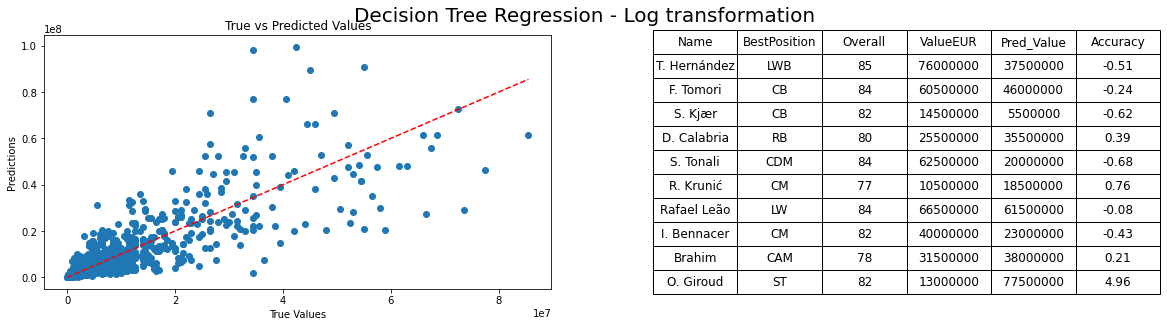

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

start_time = time.time()
y_train_log1p = np.log1p(y_train)
# Decision Tree Regression
DT_log_Model = DecisionTreeRegressor(random_state=26)
DT_log_Model.fit(X_train, y_train_log1p)
y_pred_log1p = DT_log_Model.predict(X_test)
y_pred = np.expm1(y_pred_log1p)
# Evaluate R2 MAE and MSE
r2 = round(r2_score(y_test, y_pred), 4)
mae = round(mean_absolute_error(y_test, y_pred), 0)
mse = round(mean_squared_error(y_test, y_pred), 0)
print('R2 Score:', r2)
print('MAE:', mae)
print('MSE:', mse)
end_time = time.time()
print('Calculation Time:', round(end_time - start_time, 4), 'seconds')

# Update Scatter
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
fig.subplots_adjust(bottom=0)
fig.suptitle('Decision Tree Regression - Log transformation', fontsize=20)
ax1.scatter(y_test, y_pred)
ax1.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
ax1.set_xlabel("True Values")
ax1.set_ylabel("Predictions")
ax1.set_title('True vs Predicted Values')
# Update Table log
milan_pred = DT_log_Model.predict(X_milan)

milan_players['Pred_Value'] = np.round(np.expm1(milan_pred), 0).astype(int)
milan_players['Accuracy'] = np.round((np.divide(milan_players['Pred_Value'], milan_players['ValueEUR'])-1),2)
milan_players_selected = milan_players[['Name', 'BestPosition', 'Overall', 'ValueEUR', 'Pred_Value', 'Accuracy']]
milan_players_selected = milan_players_selected.reindex(index=[0, 3, 6, 7, 2, 9, 1, 4, 8, 5])
table_data = [list(milan_players_selected.columns)] + milan_players_selected.values.tolist()
table = ax2.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)
plt.axis('off')
plt.show()

In [41]:
print(DT_Model.get_params())
print(DT_log_Model.get_params())

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 26, 'splitter': 'best'}
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 26, 'splitter': 'best'}


<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>4.7 Random Forest Regression </b></font></div></td></tr>
</table>

In [42]:
'''# Best Hyper
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10],
    'min_samples_split': [45],
    'min_samples_leaf': [15],
    'max_leaf_nodes': [45]}
rf_Model = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
rf_Model.fit(X_train, y_train)
best_params = rf_Model.best_params_
print('Best Parameters:', best_params)
'''

"# Best Hyper\nparam_grid = {\n    'n_estimators': [50, 100],\n    'max_depth': [10],\n    'min_samples_split': [45],\n    'min_samples_leaf': [15],\n    'max_leaf_nodes': [45]}\nrf_Model = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)\nrf_Model.fit(X_train, y_train)\nbest_params = rf_Model.best_params_\nprint('Best Parameters:', best_params)\n"

R2 Score: 0.8933
MAE: 697402.0
MSE: 4623413076250.0
Calculation Time: 70.3884 seconds


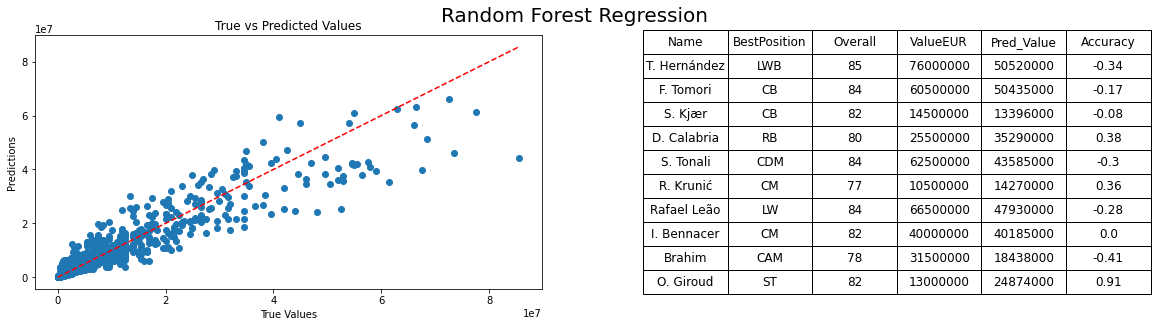

In [43]:
start_time = time.time()
# Random Forest Regression
RF_Model = RandomForestRegressor(random_state=26)
RF_Model.fit(X_train, y_train)
y_pred = RF_Model.predict(X_test)
# Evaluate R2 MAE and MSE
r2 = round(r2_score(y_test, y_pred), 4)
mae = round(mean_absolute_error(y_test, y_pred), 0)
mse = round(mean_squared_error(y_test, y_pred), 0)
print('R2 Score:', r2)
print('MAE:', mae)
print('MSE:', mse)
end_time = time.time()
print('Calculation Time:', round(end_time - start_time, 4), 'seconds')

# Update Scatter
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
fig.subplots_adjust(bottom=0)
fig.suptitle('Random Forest Regression', fontsize=20)
ax1.scatter(y_test, y_pred)
ax1.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
ax1.set_xlabel("True Values")
ax1.set_ylabel("Predictions")
ax1.set_title('True vs Predicted Values')
# Update Table log
milan_pred = RF_Model.predict(X_milan)

milan_players['Pred_Value'] = np.round((milan_pred), 0).astype(int)
milan_players['Accuracy'] = np.round((np.divide(milan_players['Pred_Value'], milan_players['ValueEUR'])-1),2)
milan_players_selected = milan_players[['Name', 'BestPosition', 'Overall', 'ValueEUR', 'Pred_Value', 'Accuracy']]
milan_players_selected = milan_players_selected.reindex(index=[0, 3, 6, 7, 2, 9, 1, 4, 8, 5])
table_data = [list(milan_players_selected.columns)] + milan_players_selected.values.tolist()
table = ax2.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)
plt.axis('off')
plt.show()

R2 Score: 0.8769
MAE: 679591.0
MSE: 5334894705692.0
Calculation Time: 56.5361 seconds


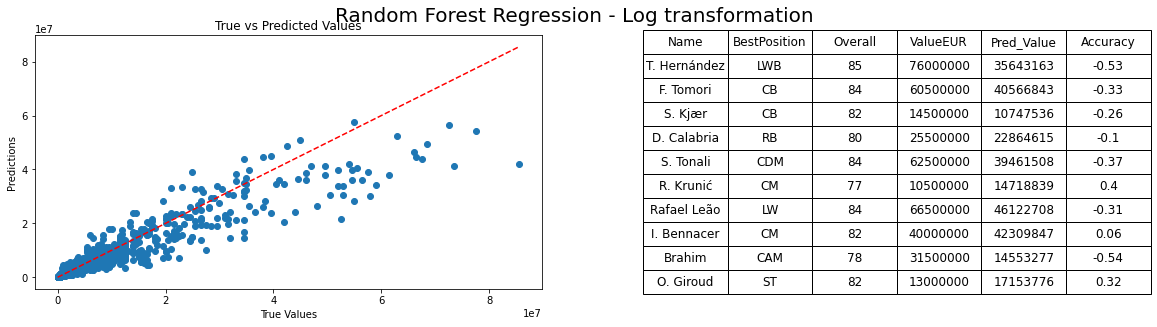

In [44]:
start_time = time.time()
y_train_log1p = np.log1p(y_train)
# Random Forest Regression
RF_log_Model = RandomForestRegressor(random_state=26)
RF_log_Model.fit(X_train, y_train_log1p)
y_pred_log1p = RF_log_Model.predict(X_test)
y_pred = np.expm1(y_pred_log1p)
# Evaluate R2 MAE and MSE
r2 = round(r2_score(y_test, y_pred), 4)
mae = round(mean_absolute_error(y_test, y_pred), 0)
mse = round(mean_squared_error(y_test, y_pred), 0)
print('R2 Score:', r2)
print('MAE:', mae)
print('MSE:', mse)
end_time = time.time()
print('Calculation Time:', round(end_time - start_time, 4), 'seconds')

# Update Scatter
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
fig.subplots_adjust(bottom=0)
fig.suptitle('Random Forest Regression - Log transformation', fontsize=20)
ax1.scatter(y_test, y_pred)
ax1.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
ax1.set_xlabel("True Values")
ax1.set_ylabel("Predictions")
ax1.set_title('True vs Predicted Values')
# Update Table log
milan_pred = RF_log_Model.predict(X_milan)

milan_players['Pred_Value'] = np.round(np.expm1(milan_pred), 0).astype(int)
milan_players['Accuracy'] = np.round((np.divide(milan_players['Pred_Value'], milan_players['ValueEUR'])-1),2)
milan_players_selected = milan_players[['Name', 'BestPosition', 'Overall', 'ValueEUR', 'Pred_Value', 'Accuracy']]
milan_players_selected = milan_players_selected.reindex(index=[0, 3, 6, 7, 2, 9, 1, 4, 8, 5])
table_data = [list(milan_players_selected.columns)] + milan_players_selected.values.tolist()
table = ax2.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)
plt.axis('off')
plt.show()

In [45]:
print(RF_Model.get_params())
print(RF_log_Model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 26, 'verbose': 0, 'warm_start': False}
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 26, 'verbose': 0, 'warm_start': False}


<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>4.8 Gradient Boosting Regression </b></font></div></td></tr>
</table>

In [46]:
'''# Best Hyper
param_grid = {
    'n_estimators': [50],
    'learning_rate': [0.1, 0.5],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
    'max_features': ['auto', 'sqrt', 'log2']}
gb_Model = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5)
gb_Model.fit(X_train, y_train)
best_params = gb_Model.best_params_
print('Best Parameters:', best_params)
'''

"# Best Hyper\nparam_grid = {\n    'n_estimators': [50],\n    'learning_rate': [0.1, 0.5],\n    'max_depth': [5, 10],\n    'min_samples_split': [2, 5],\n    'min_samples_leaf': [1, 3],\n    'max_features': ['auto', 'sqrt', 'log2']}\ngb_Model = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5)\ngb_Model.fit(X_train, y_train)\nbest_params = gb_Model.best_params_\nprint('Best Parameters:', best_params)\n"

R2 Score: 0.9147
MAE: 741671.0
MSE: 3694760751632.0
Calculation Time: 13.8944 seconds


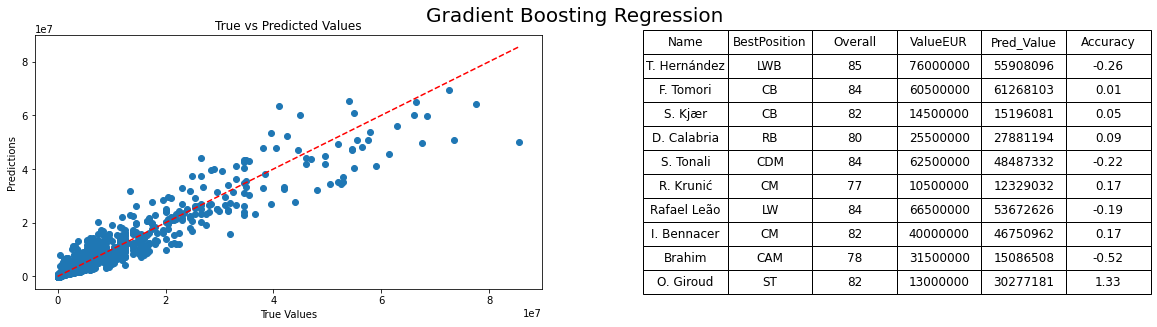

In [47]:
start_time = time.time()
# Gradient Boosting Regression
GB_Model = GradientBoostingRegressor(random_state=26)
GB_Model.fit(X_train, y_train)
y_pred = GB_Model.predict(X_test)
# Evaluate R2 MAE and MSE
r2 = round(r2_score(y_test, y_pred), 4)
mae = round(mean_absolute_error(y_test, y_pred), 0)
mse = round(mean_squared_error(y_test, y_pred), 0)
print('R2 Score:', r2)
print('MAE:', mae)
print('MSE:', mse)
end_time = time.time()
print('Calculation Time:', round(end_time - start_time, 4), 'seconds')

# Update Scatter
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
fig.subplots_adjust(bottom=0)
fig.suptitle('Gradient Boosting Regression', fontsize=20)
ax1.scatter(y_test, y_pred)
ax1.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
ax1.set_xlabel("True Values")
ax1.set_ylabel("Predictions")
ax1.set_title('True vs Predicted Values')
# Update Table log
milan_pred = GB_Model.predict(X_milan)

milan_players['Pred_Value'] = np.round((milan_pred), 0).astype(int)
milan_players['Accuracy'] = np.round((np.divide(milan_players['Pred_Value'], milan_players['ValueEUR'])-1),2)
milan_players_selected = milan_players[['Name', 'BestPosition', 'Overall', 'ValueEUR', 'Pred_Value', 'Accuracy']]
milan_players_selected = milan_players_selected.reindex(index=[0, 3, 6, 7, 2, 9, 1, 4, 8, 5])
table_data = [list(milan_players_selected.columns)] + milan_players_selected.values.tolist()
table = ax2.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)
plt.axis('off')
plt.show()

R2 Score: 0.8883
MAE: 650905.0
MSE: 4839335412423.0
Calculation Time: 14.7981 seconds


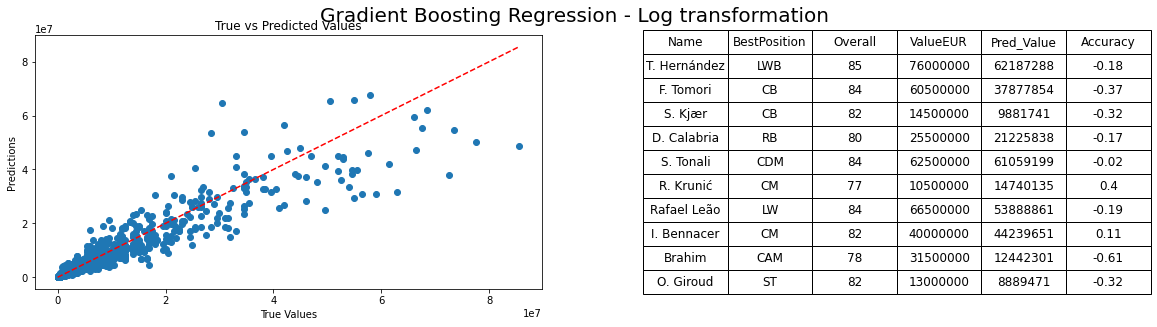

In [48]:
start_time = time.time()
y_train_log1p = np.log1p(y_train)
# Gradient Boosting Regression
GB_log_Model = GradientBoostingRegressor(random_state=26)
GB_log_Model.fit(X_train, y_train_log1p)
y_pred_log1p = GB_log_Model.predict(X_test)
y_pred = np.expm1(y_pred_log1p)
# Evaluate R2 MAE and MSE
r2 = round(r2_score(y_test, y_pred), 4)
mae = round(mean_absolute_error(y_test, y_pred), 0)
mse = round(mean_squared_error(y_test, y_pred), 0)
print('R2 Score:', r2)
print('MAE:', mae)
print('MSE:', mse)
end_time = time.time()
print('Calculation Time:', round(end_time - start_time, 4), 'seconds')

# Update Scatter
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
fig.subplots_adjust(bottom=0)
fig.suptitle('Gradient Boosting Regression - Log transformation', fontsize=20)
ax1.scatter(y_test, y_pred)
ax1.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
ax1.set_xlabel("True Values")
ax1.set_ylabel("Predictions")
ax1.set_title('True vs Predicted Values')
# Update Table log
milan_pred = GB_log_Model.predict(X_milan)

milan_players['Pred_Value'] = np.round(np.expm1(milan_pred), 0).astype(int)
milan_players['Accuracy'] = np.round((np.divide(milan_players['Pred_Value'], milan_players['ValueEUR'])-1),2)
milan_players_selected = milan_players[['Name', 'BestPosition', 'Overall', 'ValueEUR', 'Pred_Value', 'Accuracy']]
milan_players_selected = milan_players_selected.reindex(index=[0, 3, 6, 7, 2, 9, 1, 4, 8, 5])
table_data = [list(milan_players_selected.columns)] + milan_players_selected.values.tolist()
table = ax2.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)
plt.axis('off')
plt.show()

In [49]:
print(GB_Model.get_params())
print(GB_log_Model.get_params())

{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 26, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 26, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>4.9 Adaboost Regression </b></font></div></td></tr>
</table>

In [50]:
'''# Best Hyper
param_grid = {
    'n_estimators': [50],
    'learning_rate': [0.1, 0.5],
    'base_estimator': [DecisionTreeRegressor(max_depth=5), DecisionTreeRegressor(max_depth=10)],
    'loss': ['linear', 'square', 'exponential']}
ab_Model = GridSearchCV(AdaBoostRegressor(), param_grid, cv=5)
ab_Model.fit(X_train, y_train)
best_params = ab_Model.best_params_
print('Best Parameters:', best_params)
'''

"# Best Hyper\nparam_grid = {\n    'n_estimators': [50],\n    'learning_rate': [0.1, 0.5],\n    'base_estimator': [DecisionTreeRegressor(max_depth=5), DecisionTreeRegressor(max_depth=10)],\n    'loss': ['linear', 'square', 'exponential']}\nab_Model = GridSearchCV(AdaBoostRegressor(), param_grid, cv=5)\nab_Model.fit(X_train, y_train)\nbest_params = ab_Model.best_params_\nprint('Best Parameters:', best_params)\n"

R2 Score: 0.7859
MAE: 1571494.0
MSE: 9279481735867.0
Calculation Time: 19.9992 seconds


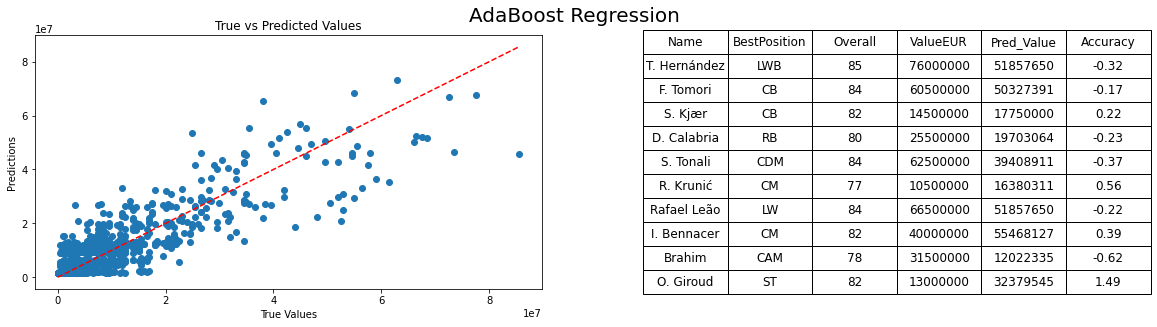

In [51]:
start_time = time.time()
# Adaboosting Regression
AB_Model = AdaBoostRegressor(random_state=26, learning_rate=0.1, n_estimators=100)
AB_Model.fit(X_train, y_train)
y_pred = AB_Model.predict(X_test)
# Evaluate R2 MAE and MSE
r2 = round(r2_score(y_test, y_pred), 4)
mae = round(mean_absolute_error(y_test, y_pred), 0)
mse = round(mean_squared_error(y_test, y_pred), 0)
print('R2 Score:', r2)
print('MAE:', mae)
print('MSE:', mse)
end_time = time.time()
print('Calculation Time:', round(end_time - start_time, 4), 'seconds')

# Update Scatter
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
fig.subplots_adjust(bottom=0)
fig.suptitle('AdaBoost Regression', fontsize=20)
ax1.scatter(y_test, y_pred)
ax1.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
ax1.set_xlabel("True Values")
ax1.set_ylabel("Predictions")
ax1.set_title('True vs Predicted Values')
# Update Table log
milan_pred = AB_Model.predict(X_milan)

milan_players['Pred_Value'] = np.round((milan_pred), 0).astype(int)
milan_players['Accuracy'] = np.round((np.divide(milan_players['Pred_Value'], milan_players['ValueEUR'])-1),2)
milan_players_selected = milan_players[['Name', 'BestPosition', 'Overall', 'ValueEUR', 'Pred_Value', 'Accuracy']]
milan_players_selected = milan_players_selected.reindex(index=[0, 3, 6, 7, 2, 9, 1, 4, 8, 5])
table_data = [list(milan_players_selected.columns)] + milan_players_selected.values.tolist()
table = ax2.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)
plt.axis('off')
plt.show()

R2 Score: 0.7171
MAE: 1009320.0
MSE: 12259157098032.0
Calculation Time: 17.7432 seconds


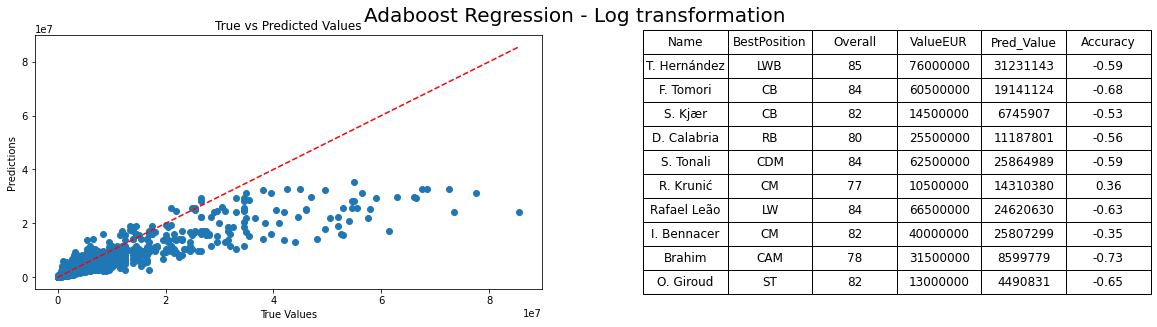

In [52]:
start_time = time.time()
y_train_log1p = np.log1p(y_train)
# Adaboosting Regression
AB_log_Model = AdaBoostRegressor(random_state=26, learning_rate=1, n_estimators=100)
AB_log_Model.fit(X_train, y_train_log1p)
y_pred_log1p = AB_log_Model.predict(X_test)
y_pred = np.expm1(y_pred_log1p)
# Evaluate R2 MAE and MSE
r2 = round(r2_score(y_test, y_pred), 4)
mae = round(mean_absolute_error(y_test, y_pred), 0)
mse = round(mean_squared_error(y_test, y_pred), 0)
print('R2 Score:', r2)
print('MAE:', mae)
print('MSE:', mse)
end_time = time.time()
print('Calculation Time:', round(end_time - start_time, 4), 'seconds')
                     
# Update Scatter
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
fig.subplots_adjust(bottom=0)
fig.suptitle('Adaboost Regression - Log transformation', fontsize=20)
ax1.scatter(y_test, y_pred)
ax1.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
ax1.set_xlabel("True Values")
ax1.set_ylabel("Predictions")
ax1.set_title('True vs Predicted Values')
# Update Table log
milan_pred = AB_log_Model.predict(X_milan)

milan_players['Pred_Value'] = np.round(np.expm1(milan_pred), 0).astype(int)
milan_players['Accuracy'] = np.round((np.divide(milan_players['Pred_Value'], milan_players['ValueEUR'])-1),2)
milan_players_selected = milan_players[['Name', 'BestPosition', 'Overall', 'ValueEUR', 'Pred_Value', 'Accuracy']]
milan_players_selected = milan_players_selected.reindex(index=[0, 3, 6, 7, 2, 9, 1, 4, 8, 5])
table_data = [list(milan_players_selected.columns)] + milan_players_selected.values.tolist()
table = ax2.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)
plt.axis('off')
plt.show()

In [53]:
print(AB_Model.get_params())
print(AB_log_Model.get_params())

{'base_estimator': None, 'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 100, 'random_state': 26}
{'base_estimator': None, 'learning_rate': 1, 'loss': 'linear', 'n_estimators': 100, 'random_state': 26}


<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3"><b>4.10 Support Vector Regression </b></font></div></td></tr>
</table>

In [54]:
'''
# Best Hyper
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma':[0.1, 1 ,10]
    'epsilon': [0.1, 0.5, 1]}
svm_Model = GridSearchCV(SVR(), param_grid, cv=5)
svm_Model.fit(X_train, y_train)
best_params = svm_Model.best_params_
print('Best Parameters:', best_params)
'''

"\n# Best Hyper\nparam_grid = {\n    'kernel': ['linear', 'poly', 'rbf'],\n    'C': [0.1, 1, 10],\n    'gamma':[0.1, 1 ,10]\n    'epsilon': [0.1, 0.5, 1]}\nsvm_Model = GridSearchCV(SVR(), param_grid, cv=5)\nsvm_Model.fit(X_train, y_train)\nbest_params = svm_Model.best_params_\nprint('Best Parameters:', best_params)\n"

R2 Score: 0.1109
MAE: 1798853.0
MSE: 38534497655933.0
Calculation Time: 27.6528 seconds


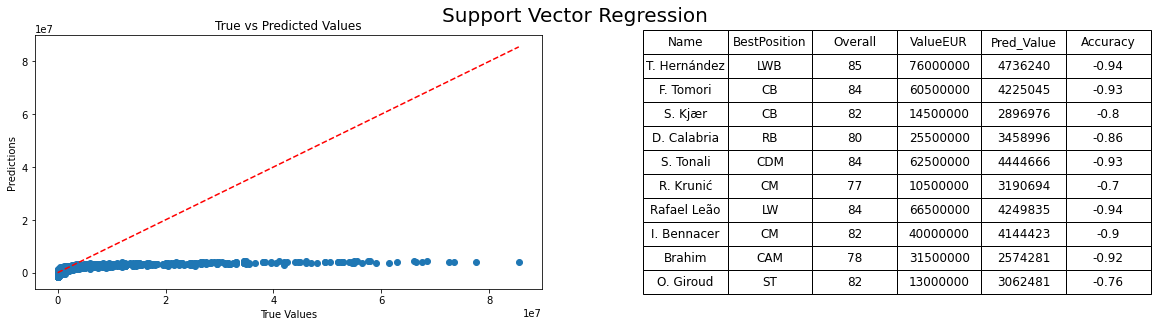

In [64]:
start_time = time.time()
# Support Vector Regression
SVM_Model = SVR(kernel='linear',C=10, gamma=10)
SVM_Model.fit(X_train, y_train)
y_pred = SVM_Model.predict(X_test)
# Evaluate R2 MAE and MSE
r2 = round(r2_score(y_test, y_pred), 4)
mae = round(mean_absolute_error(y_test, y_pred), 0)
mse = round(mean_squared_error(y_test, y_pred), 0)
print('R2 Score:', r2)
print('MAE:', mae)
print('MSE:', mse)
end_time = time.time()
print('Calculation Time:', round(end_time - start_time, 4), 'seconds')

# Update Scatter
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
fig.subplots_adjust(bottom=0)
fig.suptitle('Support Vector Regression', fontsize=20)
ax1.scatter(y_test, y_pred)
ax1.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
ax1.set_xlabel("True Values")
ax1.set_ylabel("Predictions")
ax1.set_title('True vs Predicted Values')
# Update Table log
milan_pred = SVM_Model.predict(X_milan)

milan_players['Pred_Value'] = np.round((milan_pred), 0).astype(int)
milan_players['Accuracy'] = np.round((np.divide(milan_players['Pred_Value'], milan_players['ValueEUR'])-1),2)
milan_players_selected = milan_players[['Name', 'BestPosition', 'Overall', 'ValueEUR', 'Pred_Value', 'Accuracy']]
milan_players_selected = milan_players_selected.reindex(index=[0, 3, 6, 7, 2, 9, 1, 4, 8, 5])
table_data = [list(milan_players_selected.columns)] + milan_players_selected.values.tolist()
table = ax2.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)
plt.axis('off')
plt.show()

R2 Score: 0.8662
MAE: 643371.0
MSE: 5796886799482.0
Calculation Time: 47.451 seconds


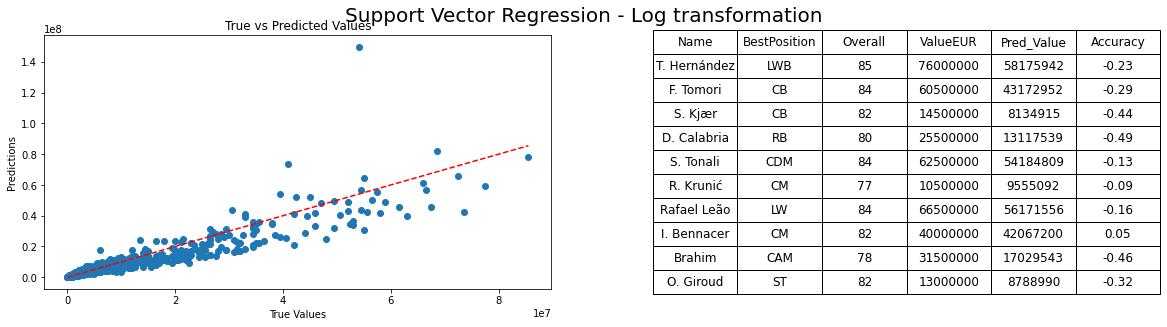

In [58]:
start_time = time.time()
y_train_log1p = np.log1p(y_train)
# Support Vector Regression
SVM_log_Model = SVR()
SVM_log_Model.fit(X_train, y_train_log1p)
y_pred_log1p = SVM_log_Model.predict(X_test)
y_pred = np.expm1(y_pred_log1p)
# Evaluate R2 MAE and MSE
r2 = round(r2_score(y_test, y_pred), 4)
mae = round(mean_absolute_error(y_test, y_pred), 0)
mse = round(mean_squared_error(y_test, y_pred), 0)
print('R2 Score:', r2)
print('MAE:', mae)
print('MSE:', mse)
end_time = time.time()
print('Calculation Time:', round(end_time - start_time, 4), 'seconds')

# Update Scatter
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
fig.subplots_adjust(bottom=0)
fig.suptitle('Support Vector Regression - Log transformation', fontsize=20)
ax1.scatter(y_test, y_pred)
ax1.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
ax1.set_xlabel("True Values")
ax1.set_ylabel("Predictions")
ax1.set_title('True vs Predicted Values')
# Update Table log
milan_pred = SVM_log_Model.predict(X_milan)

milan_players['Pred_Value'] = np.round(np.expm1(milan_pred), 0).astype(int)
milan_players['Accuracy'] = np.round((np.divide(milan_players['Pred_Value'], milan_players['ValueEUR'])-1),2)
milan_players_selected = milan_players[['Name', 'BestPosition', 'Overall', 'ValueEUR', 'Pred_Value', 'Accuracy']]
milan_players_selected = milan_players_selected.reindex(index=[0, 3, 6, 7, 2, 9, 1, 4, 8, 5])
table_data = [list(milan_players_selected.columns)] + milan_players_selected.values.tolist()
table = ax2.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)
plt.axis('off')
plt.show()

In [59]:
print(SVM_Model.get_params())
print(SVM_log_Model.get_params())

{'C': 30, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 30, 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


<table style="width: 800px"><tr><td bgcolor="darkred"><font color="white"><div style="text-align: left;"><font size="4"><b>5. Model Comparision</b></font></div></font></td></tr></table>

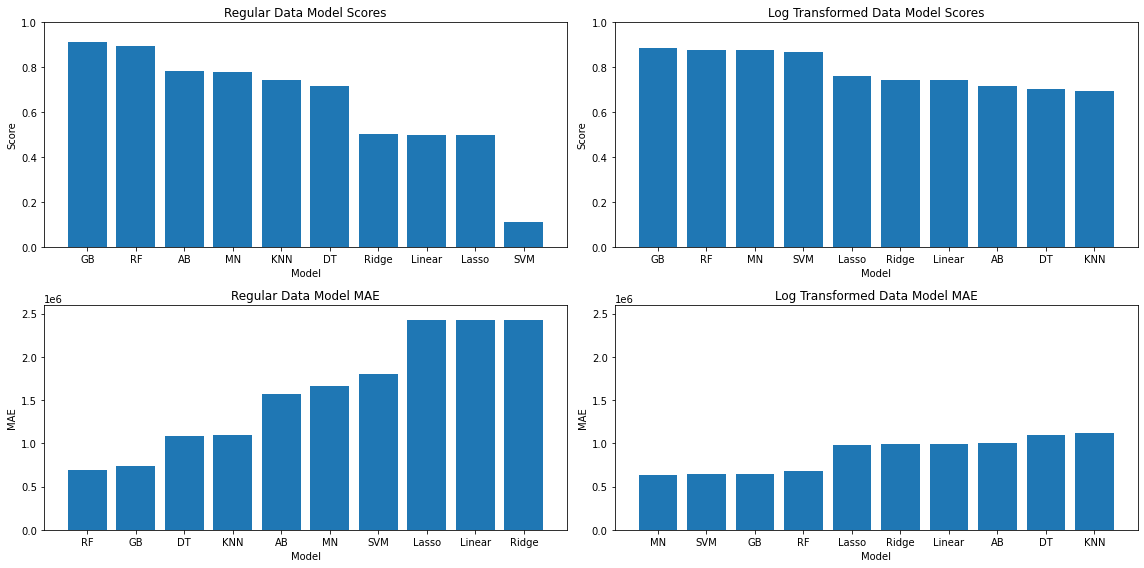

In [105]:
# Score data
regS_models = ['Linear', 'Ridge', 'Lasso', 'MN', 'KNN', 'DT', 'RF', 'GB', 'AB', 'SVM']
regS_scores = [0.5013, 0.5014, 0.5013, 0.7785, 0.7428, 0.7162, 0.8933, 0.9147, 0.7859, 0.1109]
regS = pd.DataFrame({'Regular Model': regS_models, 'Score': regS_scores})

logS_models = ['Linear', 'Ridge', 'Lasso', 'MN', 'KNN', 'DT', 'RF', 'GB', 'AB', 'SVM']
logS_scores = [0.7453, 0.7455, 0.7632, 0.8763, 0.6932, 0.705, 0.8769, 0.8883, 0.7171, 0.8662]
logS = pd.DataFrame({'Log Transformed Model': logS_models, 'Score': logS_scores})

regM_models = ['Linear', 'Ridge', 'Lasso', 'MN', 'KNN', 'DT', 'RF', 'GB', 'AB', 'SVM']
regM_mae = [2430090, 2430157, 2430089, 1663694, 1094924, 1082433, 697402, 741671, 1571494, 1798853]
regM = pd.DataFrame({'Regular Model': regM_models, 'MAE': regM_mae})

logM_models = ['Linear', 'Ridge', 'Lasso', 'MN', 'KNN', 'DT', 'RF', 'GB', 'AB', 'SVM']
logM_mae = [988093, 988040, 985644, 629980, 1122900, 1097749, 679591, 650905, 1009320, 643371]
logM = pd.DataFrame({'Log Transformed Model': logM_models, 'MAE': logM_mae})

# Chart Frame
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
# Regular
reg_sorted = reg.sort_values(by='Score', ascending=False)
ax1.bar(reg_sorted['Regular Model'], reg_sorted['Score'])
ax1.set_ylim(0, 1)
ax1.set_xlabel('Model')
ax1.set_ylabel('Score')
ax1.set_title('Regular Data Model Scores')
# Log Transformed
log_sorted = log.sort_values(by='Score', ascending=False)
ax2.bar(log_sorted['Log Transformed Model'], log_sorted['Score'])
ax2.set_ylim(0, 1)
ax2.set_xlabel('Model')
ax2.set_ylabel('Score')
ax2.set_title('Log Transformed Data Model Scores')
# Regular
regM_sorted = regM.sort_values(by='MAE', ascending=True)
ax3.bar(regM_sorted['Regular Model'], regM_sorted['MAE'])
ax3.set_ylim(0,2600000)
ax3.set_xlabel('Model')
ax3.set_ylabel('MAE')
ax3.set_title('Regular Data Model MAE')
# Log Transformed
logM_sorted = logM.sort_values(by='MAE', ascending=True)
ax4.bar(logM_sorted['Log Transformed Model'], logM_sorted['MAE'])
ax4.set_ylim(0,2600000)
ax4.set_xlabel('Model')
ax4.set_ylabel('MAE')
ax4.set_title('Log Transformed Data Model MAE')

fig.tight_layout()
plt.show()

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3">Based on the Score and MAE of 10 regression models, we can make the following conclusion:</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>1. Gradient Boosting and Random Forest regression models achieve scores of around 90% and low MAE values on both the original and log-transformed targets.</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>2. The Polynomial and SVM regression models have the lowest MAE on log transformation, but they perform poorly on the original dataset.</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>3. Linear regression model fits poorly on this dataset, and neither Ridge nor Lasso provide a significant improvement.</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>4. Decision Tree and KNN regression perform better on the original dataset than on the log-transformed dataset, which means that log transformation still loses some of the original data information.. </font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>5. Overall, the MAE of the models after log transformation is much lower, indicating that log transformation should be considered for variables with severe skewness when performing regression prediction.</font></div></td></tr></table>

<table style="width: 800px"><tr><td bgcolor="darkred"><font color="white"><div style="text-align: left;"><font size="4"><b>6. Conclusion</b></font></div></font></td></tr></table>

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3">Through this analysis, we successfully predicted the market prices of FIFA23 players using their attributes with an accuracy of over 90%. From our analysis, we can also draw the following conclusions:</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>><b>No free lunch theorem</b>: in the field of machine learning, no algorithm is superior to others, and we can only find the most suitable method through continuous experimentation.</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>><b>Ensemble methods</b> have a wider range of applicability and are more likely to produce better results. Compared to traditional SVM algorithms, Ensemble methods do not require spending a lot of time searching for optimal hyperparameters.</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>><b>Feature engineering</b> is more important than model selection. Choosing the right features directly affects the success of the final model.</font></div></td></tr>
</table>

<table style="width: 800px">
<tr><td><div style="text-align: left;"><font size="3">Next Step:</font></div></td></tr>
<tr><td><div style="text-align: left;"><font size="3">>>I will combine unsupervised learning methods and classification learning methods to explore the relationship between player skills and their position on the field.</font></div></td></tr>
</table>